In [14]:
import tensorflow as tf

def encoder_block(input_tensor, num_filters):
    """Encoder block: Conv2D -> ReLU -> Conv2D -> ReLU -> MaxPooling."""
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input_tensor)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    p = tf.keras.layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(input_tensor, skip_tensor, num_filters):
    """Decoder block: UpSampling2D -> Conv2D -> Concatenate -> Conv2D -> ReLU."""
    x = tf.keras.layers.UpSampling2D((2, 2))(input_tensor)
    x = tf.keras.layers.Conv2D(num_filters, 2, padding="same")(x)
    x = tf.keras.layers.Concatenate()([x, skip_tensor])
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    return x

def unet_model(input_shape=(256, 256, 3), num_classes=2):
    """U-Net model."""
    inputs = tf.keras.layers.Input(input_shape)

    # Contracting Path
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # Bottleneck
    b1 = tf.keras.layers.Conv2D(1024, 3, padding="same")(p4)
    b1 = tf.keras.layers.Activation("relu")(b1)
    b1 = tf.keras.layers.Conv2D(1024, 3, padding="same")(b1)
    b1 = tf.keras.layers.Activation("relu")(b1)

    # Expansive Path
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output
    outputs = tf.keras.layers.Conv2D(num_classes, 1, padding="same", activation="sigmoid")(d4)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="U-Net")
    return model

if __name__ == '__main__':
    model = unet_model(input_shape=(256, 256, 3), num_classes=2)
    model.summary()


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_138 (Conv2D) │ (None, 256, 256,  │      1,792 │ input_layer_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_108      │ (None, 256, 256,  │          0 │ conv2d_138[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_139 (Conv2D) │ (None, 256, 256,  │     36,928 │ activation_108[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_109      │ (None, 256, 256,  │          0 │ conv2d_139[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 128, 128,  │          0 │ activation_109[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_140 (Conv2D) │ (None, 128, 128,  │     73,856 │ max_pooling2d_24… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_110      │ (None, 128, 128,  │          0 │ conv2d_140[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_141 (Conv2D) │ (None, 128, 128,  │    147,584 │ activation_110[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_111      │ (None, 128, 128,  │          0 │ conv2d_141[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 64, 64,    │          0 │ activation_111[0… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_142 (Conv2D) │ (None, 64, 64,    │    295,168 │ max_pooling2d_25… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_112      │ (None, 64, 64,    │          0 │ conv2d_142[0][0]  │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_143 (Conv2D) │ (None, 64, 64,    │    590,080 │ activation_112[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_113      │ (None, 64, 64,    │          0 │ conv2d_143[0][0]  │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 32, 32,    │          0 │ activation_113[0… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_144 (Conv2D) │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_26

 Total params: 31,031,810 (118.38 MB)

 Trainable params: 31,031,810 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


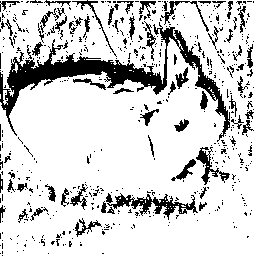

In [28]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Load the image
img = Image.open(r'D:\Subject\Computer Vision\Sections\cat.jpg')
# Preprocess the image
img = img.resize((256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array[:,:,:3], axis=0)
img_array = img_array / 255.

# Load the model
model = unet_model(input_shape=(256, 256, 3), num_classes=2)

# Make predictions
predictions = model.predict(img_array)

# Convert predictions to a numpy array and resize to original image size
predictions = np.squeeze(predictions, axis=0)
predictions = np.argmax(predictions, axis=-1)
predictions = Image.fromarray(np.uint8(predictions*255))
predictions = predictions.resize((img.width, img.height))

# Save the predicted image
predictions.save(r'D:\Subject\Computer Vision\Sections\predicted_image.jpg')
predictions
